## Proyecto Análisis de Datos

En la clase de hoy vamos a ver un Proyecto completo de Análisis de Datos completo realizando todos los pasos necesarios:

* Definición del problema
* Búsqueda de datos
* Análisis exploratorio
* Limpieza
* Visualizaciones
* Presentación de resultados. 


### Definición del Problema

En este caso queremos conocer información sobre las cuentas de instagram que mayor cantidad de seguidores tienen

### Búsqueda de datos

Utilizaramos un dataset extraído de Kaggle que cuenta con los datos de las 200 cuentas de instagram con mayores seguidores en el año 2023. extraído de https://www.kaggle.com/datasets/faisaljanjua0555/top-200-most-followed-instagram-accounts-2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%


In [4]:
data.shape

(200, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          200 non-null    int64 
 1   name          200 non-null    object
 2   channel_Info  195 non-null    object
 3   Category      193 non-null    object
 4   Posts         200 non-null    object
 5   Followers     200 non-null    object
 6   Avg. Likes    200 non-null    object
 7   Eng Rate      200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [6]:
# Vamos a reenombras las columnas al español

data.columns

Index(['rank', 'name', 'channel_Info', 'Category', 'Posts', 'Followers',
       'Avg. Likes', 'Eng Rate'],
      dtype='object')

In [7]:
data.columns = ["puesto", "nombre", "descripcion", "categoria", "publicaciones", "seguidores", "me_gusta_promedio", "tasa_participacion"]

In [ ]:
data.columns

Index(['puesto', 'nombre', 'descripcion', 'categoria', 'publicaciones',
       'seguidores', 'me_gusta_promedio', 'tasa_participacion'],
      dtype='object')

In [8]:
data.head()

,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%


In [ ]:
data.tail()

,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%
199,200,paollaoliveirareal,female,entertainment,4.8K,34.9M,4.78K,0.7%


In [ ]:
data.dtypes

puesto                 int64
nombre                object
descripcion           object
categoria             object
publicaciones         object
seguidores            object
me_gusta_promedio     object
tasa_participacion    object
dtype: object

#### Columna *descripcion*

In [9]:
# Vamos a explorar la distribución de datos de descripcion 

data["descripcion"].value_counts()

male         93
female       74
brand        15
community    13
Name: descripcion, dtype: int64

In [10]:
# Vamos a explorar la distribución de datos de categoria 

data["categoria"].value_counts()

entertainment               129
Health, Sports & Fitness     39
fashion                      10
News & Politics               3
Beauty & Makeup               3
photography                   2
technology                    2
food                          2
Lifestyle                     1
Finance                       1
Craft/DIY                     1
Name: categoria, dtype: int64

#### Columnas *publicaciones*, *seguidores*, *tasa_participacion* y *me_gusta_promedio*

Poder ver como un problema es que los datos numéricos los está tomando como *object*, vemos que el problema es que está en el número y luego "k"/ "m" o "%" y no lo puede leer como nùmero. Lo que vamos a realizar es reemplazar esas letras y símbolos por números utilizando *apply* y *lambda* y luego cambiar el tipo de dato en cada una de las columnas utilizando el método [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [11]:
data['publicaciones']

0       7.3K
1       3.4K
2         1K
3         7K
4       1.8K
       ...  
195    16.8K
196     1.1K
197     6.3K
198     7.8K
199     4.8K
Name: publicaciones, Length: 200, dtype: object

In [12]:
tiene_k = data['publicaciones'].apply(lambda x: 'K' in x)

In [13]:
factor = tiene_k.replace({True:1000,False:1})

In [14]:
# luego reemplazamos K por 00 (el tercer cero no se coloca porque quitamos los puntos decimales)

data["publicaciones_M"] = data["publicaciones"].apply(lambda x: x.replace("K", ""))

In [15]:
data['publicaciones_M']

0       7.3
1       3.4
2         1
3         7
4       1.8
       ... 
195    16.8
196     1.1
197     6.3
198     7.8
199     4.8
Name: publicaciones_M, Length: 200, dtype: object

In [16]:
# Luego convertimos el valor en numérico

data["publicaciones_M"] = data["publicaciones_M"].astype(float)

In [17]:
data['publicaciones_M']

0       7.3
1       3.4
2       1.0
3       7.0
4       1.8
       ... 
195    16.8
196     1.1
197     6.3
198     7.8
199     4.8
Name: publicaciones_M, Length: 200, dtype: float64

In [18]:
# Multiplicamos los valores por 1000

data["publicaciones_M"] = data["publicaciones_M"]*factor

In [26]:
data["publicaciones_M"]

0       7300.0
1       3400.0
2       1000.0
3       7000.0
4       1800.0
        ...   
195    16800.0
196     1100.0
197     6300.0
198     7800.0
199     4800.0
Name: publicaciones_M, Length: 200, dtype: float64

In [27]:
data["seguidores"] = data["seguidores"].apply(lambda x: x.replace("M", ""))
data["seguidores"]=data["seguidores"].astype(float)
data["seguidores"] = data["seguidores"]*1000000

AttributeError: ignored

In [21]:
data["seguidores"]

0      580100000.0
1      519900000.0
2      403700000.0
3      375900000.0
4      365300000.0
          ...     
195     35400000.0
196     35300000.0
197     35100000.0
198     35000000.0
199     34900000.0
Name: seguidores, Length: 200, dtype: float64

In [25]:
data["me_gusta_promedio"] = data["me_gusta_promedio"].apply(lambda x: x.replace("K", ""))
data["me_gusta_promedio"]=data["me_gusta_promedio"].astype(float)
data["me_gusta_promedio"] = data["me_gusta_promedio"]*1000

AttributeError: ignored

In [28]:
data["me_gusta_promedio"]

0       7310.0
1       3410.0
2        970.0
3       7020.0
4       1850.0
        ...   
195    16780.0
196     1140.0
197     6310.0
198     7770.0
199     4780.0
Name: me_gusta_promedio, Length: 200, dtype: float64

In [23]:
data["tasa_participacion"] = data["tasa_participacion"].apply(lambda x: x.replace("%", ""))
data["tasa_participacion"]=data["tasa_participacion"].astype(float)

In [24]:
data["tasa_participacion"]

0      0.1
1      1.4
2      1.7
3      1.7
4      1.1
      ... 
195    0.6
196    3.5
197    1.2
198    0.4
199    0.7
Name: tasa_participacion, Length: 200, dtype: float64

In [29]:
data.dtypes

puesto                  int64
nombre                 object
descripcion            object
categoria              object
publicaciones          object
seguidores            float64
me_gusta_promedio     float64
tasa_participacion    float64
publicaciones_M       float64
dtype: object

In [35]:
# Revisamos los datos nulos

data.isnull().sum()

puesto                0
nombre                0
descripcion           5
categoria             7
publicaciones         0
seguidores            0
me_gusta_promedio     0
tasa_participacion    0
publicaciones_M       0
dtype: int64

In [36]:
# Primero revisamos la columan descripcion

mask_nulo_descripcion = data["descripcion"].isnull()
mask_nulo_descripcion

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: descripcion, Length: 200, dtype: bool

In [64]:
data[mask_nulo_descripcion]

,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion,publicaciones_M
104,105,michelleobama,female,Finance,691,51900000.0,691000.0,0.8,691.0
118,119,jungkook.97,male,NaN,87,49200000.0,87000.0,15.2,87.0
147,148,uarmyhope,male,fashion,171,42200000.0,171000.0,18.5,171.0
158,159,agustd,male,NaN,83,41200000.0,83000.0,25.3,83.0
177,178,tyga,male,entertainment,27,37700000.0,27000.0,1.7,27.0


In [46]:
data.loc[147,'seguidores':"me_gusta_promedio"]

seguidores           42200000.0
me_gusta_promedio      171000.0
Name: 147, dtype: object

In [58]:
ejemplo = pd.DataFrame([{1:'hola','b':'chau'},{1:'cucu','b':'pepe'}])

In [63]:
ejemplo.index = ['Dos','Dos']

In [60]:
ejemplo

,1,b
Dos,hola,chau
Dos,cucu,pepe


In [61]:
ejemplo.loc['Dos',1]

Dos    hola
Dos    cucu
Name: 1, dtype: object

In [45]:
data.iloc[147,5:7]

seguidores           42200000.0
me_gusta_promedio      171000.0
Name: 147, dtype: object

Podemos considerar que michelleobama es "female" ylos demàs ("jungkook.97", "uarmyhope", "agustd" y "tyga") son "male" (por el conocimiento sobre el dataset por parte del Analista de Datos. Vamos a **imputar** los valores correspondientes)

In [38]:
data.loc[104, "descripcion"]

nan

In [39]:
data.loc[104, "descripcion"] = "female"

In [40]:
lista_filas = [118,147,158,177]

for nro_fila in lista_filas:
    data.loc[nro_fila, "descripcion"] = "male"

In [41]:
lista = ['Pepe','Juana', 'Ramiro']
for nombre in lista:
  print (f'Hola {nombre}')

Hola Pepe
Hola Juana
Hola Ramiro


In [ ]:
# revisamos la operación

data[mask_nulo_descripcion]

In [ ]:
data.isnull().sum()

In [68]:
# Ahora revisamos categoria
data[data["categoria"].isnull()]


,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion,publicaciones_M
14,15,virat.kohli,male,NaN,1.5K,228000000.0,1480.0,1.2,1500.0
15,16,kendalljenner,male,NaN,731,223400000.0,731000.0,2.3,731.0
19,20,kendalljenner,male,NaN,824,204400000.0,824000.0,2.5,824.0
21,22,natgeo,male,NaN,26K,196100000.0,26020.0,0.1,26000.0
118,119,jungkook.97,male,NaN,87,49200000.0,87000.0,15.2,87.0
150,151,jin,male,NaN,100,42100000.0,100000.0,23.0,100.0
158,159,agustd,male,NaN,83,41200000.0,83000.0,25.3,83.0


In [71]:
data.head(25)

,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion,publicaciones_M
0,1,instagram,brand,photography,7.3K,580100000.0,7310.0,0.1,7300.0
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519900000.0,3410.0,1.4,3400.0
2,3,leomessi,male,"Health, Sports & Fitness",1K,403700000.0,970.0,1.7,1000.0
3,4,kyliejenner,female,entertainment,7K,375900000.0,7020.0,1.7,7000.0
4,5,selenagomez,female,entertainment,1.8K,365300000.0,1850.0,1.1,1800.0
5,6,therock,male,entertainment,7K,354300000.0,7030.0,0.3,7000.0
6,7,arianagrande,female,entertainment,5K,345600000.0,4980.0,1.4,5000.0
7,8,kimkardashian,female,entertainment,5.7K,336300000.0,5730.0,0.9,5700.0
8,9,beyonce,female,entertainment,2.1K,287300000.0,2050.0,1.0,2100.0
9,10,khloekardashian,female,entertainment,4.2K,283900000.0,4190.0,0.5,4200.0


Como no sabemos exactamente cual es la categría, podemos dejarlos nulos o imputarlos por datos aleatorios, en este caso utilizaremos un método de pandas [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) que reemplaza los valores nulos, en este caso vamos a indicar que por la fila superior. 

In [70]:
data["categoria"].fillna(method="ffill", inplace=True)

In [74]:
data.isnull().sum()

puesto                0
nombre                0
descripcion           0
categoria             0
publicaciones         0
seguidores            0
me_gusta_promedio     0
tasa_participacion    0
publicaciones_M       0
dtype: int64

In [ ]:
data.describe()

#### Método *to_csv*

Para poder volver a utilizar el Dataset con las modificaciones realizadas vamos a utilizar el método [to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [77]:
# Podemos utilizar el método 

data.to_csv("instagram_limpio.csv", index=False)


#### Visualizaciones

In [78]:
data["descripcion"].value_counts()

male         97
female       75
brand        15
community    13
Name: descripcion, dtype: int64

([<matplotlib.patches.Wedge at 0x7f894d5e7220>,
 [Text(0.05181704640055825, 1.09877886478687, 'male'),
  Text(-0.5147227083088485, -0.9721422393617122, 'female'),
  Text(0.8796531898829497, -0.6604621605578562, 'brand'),
  Text(1.0771451142396813, -0.22306591597459322, 'community')],
 [Text(0.028263843491213587, 0.5993339262473836, '49%'),
  Text(-0.2807578408957355, -0.5302594032882065, '38%'),
  Text(0.47981083084524523, -0.3602520875770125, '8%'),
  Text(0.5875336986761897, -0.12167231780432355, '6%')])

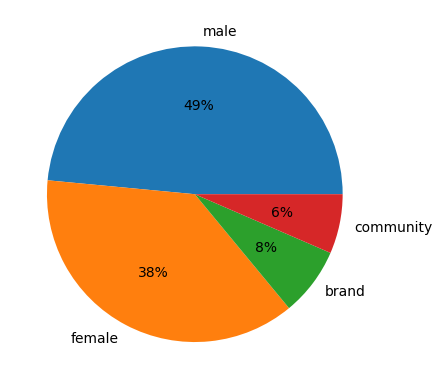

In [79]:
# Vamos a hacer un gráfico countplot con los datos de descripcion

plt.pie(data["descripcion"].value_counts(), labels=["male", "female", "brand", "community"], autopct = '%0.0f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'entertainment'),
  Text(1, 0, 'Health, Sports & Fitness'),
  Text(2, 0, 'fashion'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'Beauty & Makeup'),
  Text(5, 0, 'photography'),
  Text(6, 0, 'technology'),
  Text(7, 0, 'food'),
  Text(8, 0, 'Lifestyle'),
  Text(9, 0, 'Finance'),
  Text(10, 0, 'Craft/DIY')])

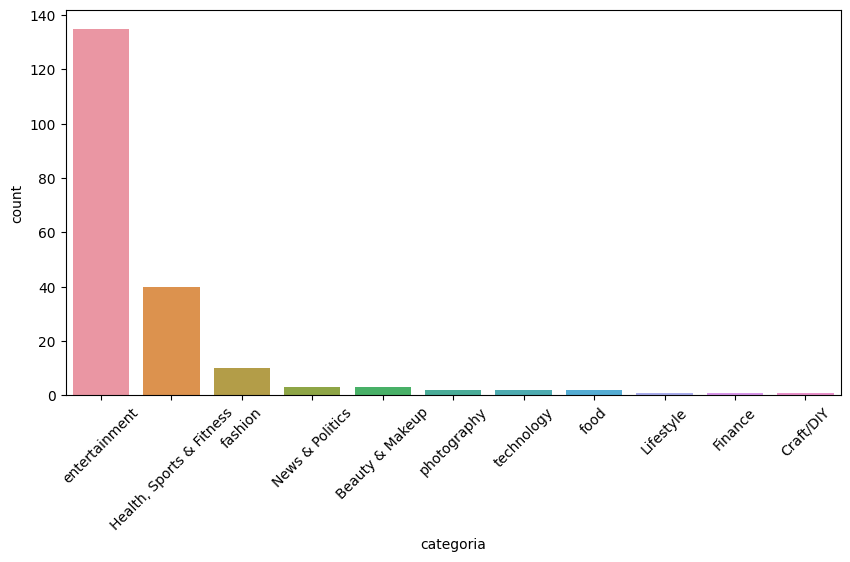

In [80]:
# Vamos a hacer un gráfico countplot con los datos de categoria

plt.figure(figsize=(10, 5))
sns.countplot(data = data, x="categoria", order=data["categoria"].value_counts().index)
plt.xticks(rotation=45)

<ipython-input-81-dff8a419761e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["seguidores"])


<Axes: xlabel='seguidores', ylabel='Density'>

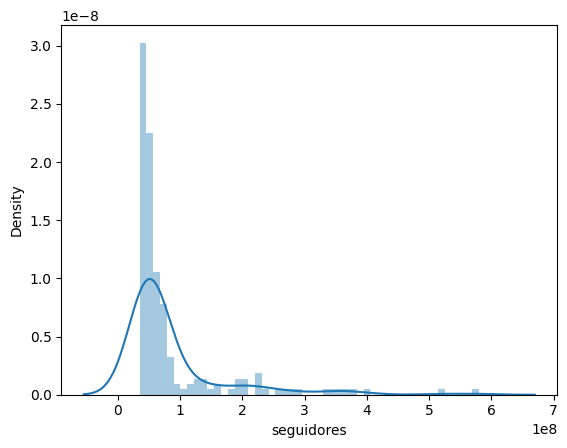

In [81]:
# Distribución de variable seguidores

sns.distplot(data["seguidores"])

Text(0, 0.5, 'cuenta de instragram')

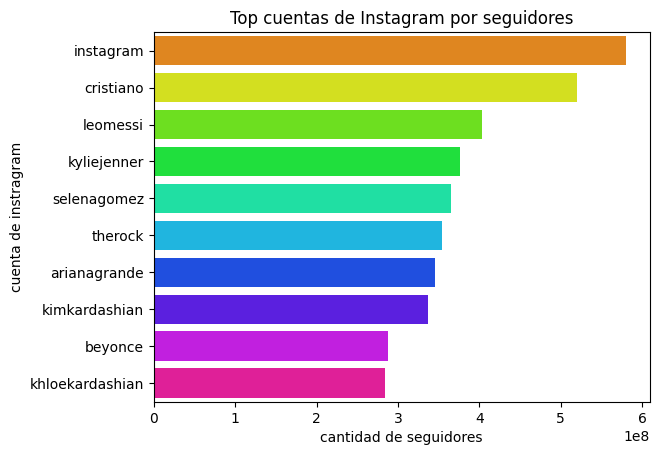

In [82]:
# Vamos a gráficar el top 10 en seguidores, para eso tenemos que hacer una agrupación:

sns.barplot(data=data[:10], x="seguidores", y="nombre", palette="hsv")
plt.title("Top cuentas de Instagram por seguidores")
plt.xlabel("cantidad de seguidores")
plt.ylabel("cuenta de instragram")

In [83]:
# Para graficar el top 10 de me gusta, tenemos que primero reordenar el dataset
top_me_gusta=data.sort_values(by="me_gusta_promedio", ascending=False)[:10]
top_me_gusta


,puesto,nombre,descripcion,categoria,publicaciones,seguidores,me_gusta_promedio,tasa_participacion,publicaciones_M
156,157,saraalikhan95,female,entertainment,889,41400000.0,889000.0,2.3,889.0
67,68,roses_are_rosie,female,entertainment,879,65200000.0,879000.0,8.3,879.0
187,188,antogriezmann,male,"Health, Sports & Fitness",872,36400000.0,872000.0,1.8,872.0
93,94,mosalah,male,"Health, Sports & Fitness",870,54800000.0,870000.0,2.3,870.0
19,20,kendalljenner,male,entertainment,824,204400000.0,824000.0,2.5,824.0
62,63,justintimberlake,male,entertainment,790,67500000.0,790000.0,0.7,790.0
148,149,georginagio,female,fashion,778,42200000.0,778000.0,5.7,778.0
130,131,theweeknd,male,entertainment,758,46500000.0,758000.0,2.6,758.0
167,168,prattprattpratt,male,entertainment,753,39900000.0,753000.0,1.1,753.0
194,195,barackobama,male,News & Politics,743,35500000.0,743000.0,1.7,743.0


Text(0, 0.5, 'cuenta de instragram')

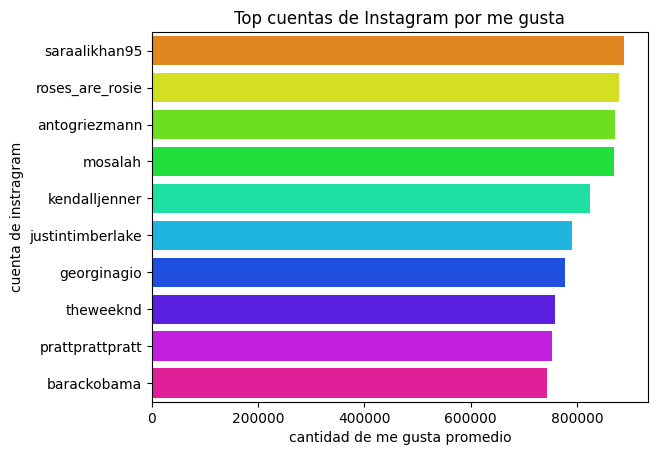

In [84]:
sns.barplot(data=top_me_gusta[:10], x="me_gusta_promedio", y="nombre", palette="hsv")
plt.title("Top cuentas de Instagram por me gusta")
plt.xlabel("cantidad de me gusta promedio")
plt.ylabel("cuenta de instragram")

<Axes: xlabel='publicaciones_M', ylabel='seguidores'>

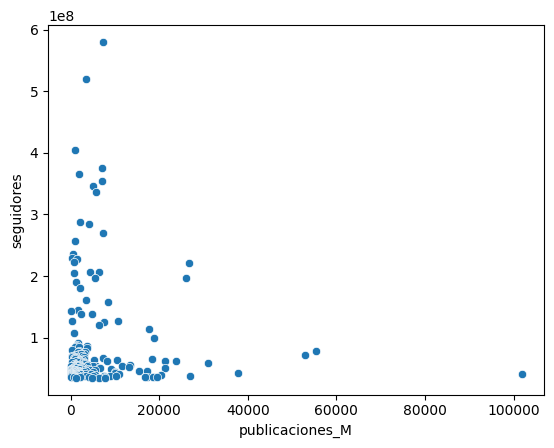

In [86]:
# Vamos a graficar la relacion entre la cantidad de publicaciones y de seguidores con un scatterplot

sns.scatterplot(data=data, x="publicaciones_M", y="seguidores")


In [91]:
# Vamos a graficar la relación entre las categorias y la cantidad de seguidores promedio para eso hay que hacer una agrupación

data_categoria_seguidores = data.groupby("categoria")["seguidores"].mean().sort_values(ascending=False)

<Axes: xlabel='seguidores', ylabel='categoria'>

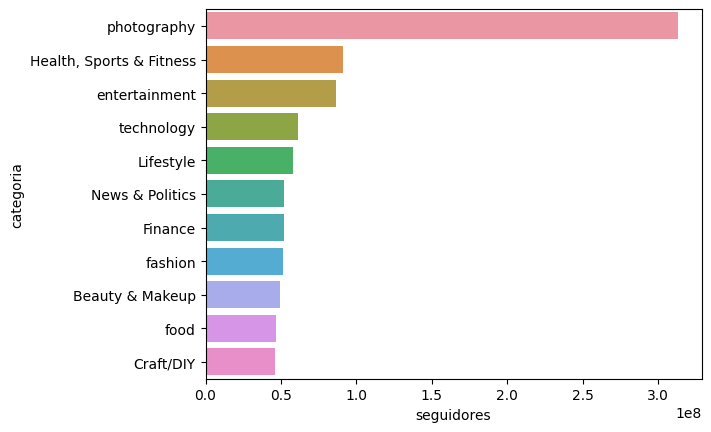

In [92]:
sns.barplot(x=data_categoria_seguidores, y=data_categoria_seguidores.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

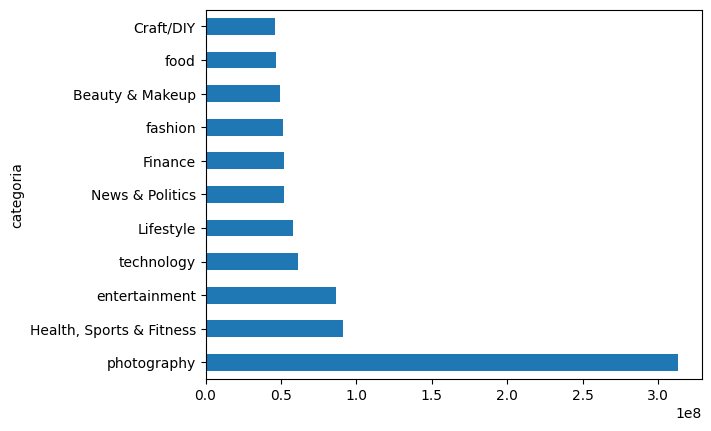

In [93]:
# Puedo guardar el gráfico utilizando el método "savefig"

from google.colab import files
data_categoria_seguidores.plot.barh(stacked=True)
plt.savefig("Seguidores x Categoria.png")
files.download("Seguidores x Categoria.png")

#fig = ax.get_figure()
#fig.savefig("output.png")
#plt.savefig('output.png')
#sns_plot.savefig("output.png")
